# Ejercicio de Regresión Logística en Python

Para comenzar se realizan los import necesarios de los paquetes que se utilizarán durante el Ejercicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb

%matplotlib inline

### Carga del archivo csv (datos de entrada)

EL archivo csv (por simplicidad, se considera que estará en el mismo directorio que el archivo de notebook.ipynb) y se asigna mediante Pandas a la variable dataframe. Al utlizar el método dataframe.head() se visualiza en pantalla los 5 registros.

In [2]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


### Visualizamos los datos

Se realiza una visualización para conocer a los atributos característicos de la información que se trabaja y su correlación.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como: "duración", "páginas", "acciones" y "valor". Se puede apreciar gráficamente entre qué valores se comprenden sus minímos y en qué intervalos se concentra la mayor densidad de registros.

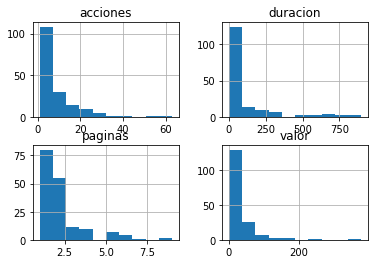

In [6]:
dataframe.drop(['clase'], 1).hist()
plt.show()

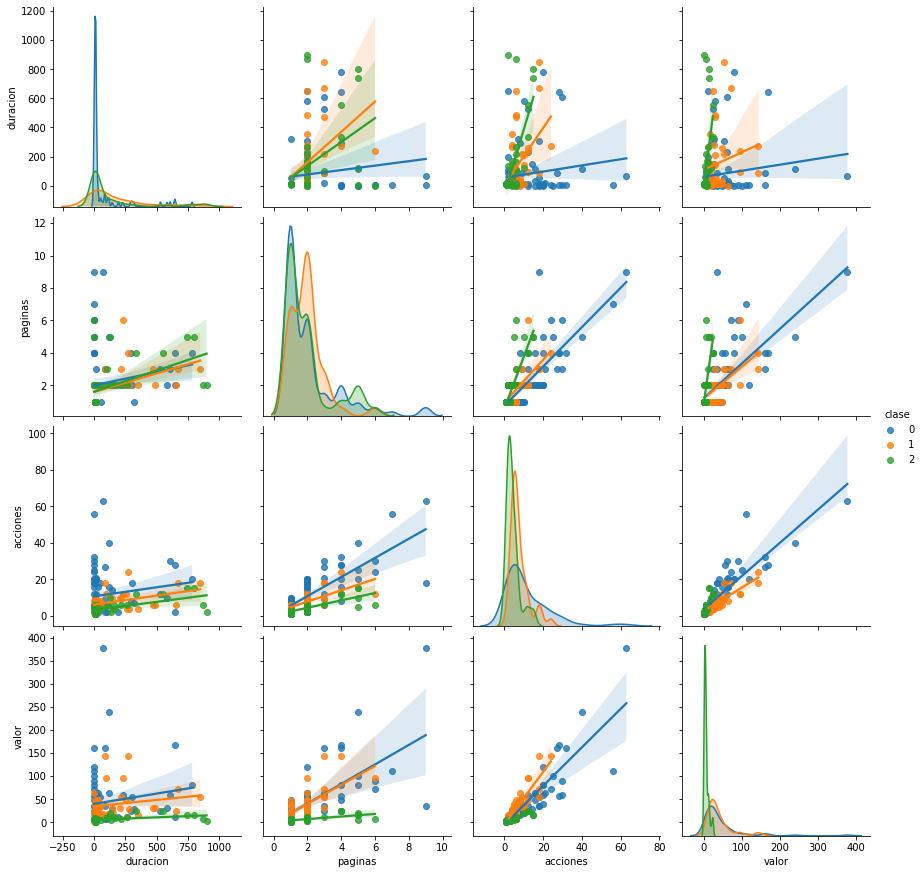

In [7]:
sb.pairplot(dataframe.dropna(), hue = 'clase', height = 3, vars = ["duracion", "paginas", "acciones", "valor"], kind = 'reg')

### Se establece el modelo R Log

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna "clase" con el método drop(). La columna "clase" se agrega al atributo y se ejecuta X.shape para comprobar la dimensión de la matriz de entrada de 170 registros por 4 columnas.

In [ ]:
x = np.array(datafra)